# Regional colocation of trends

This Jupyter notebook reproduces the Extended Data Figure 4 of the manuscript "Global changes in oceanic mesoscale currents over the satellite altimetry record". 

In [1]:
# Import libraries
import xarray as xr
import cmocean as cm
import cartopy.crs as ccrs

import pylab as plt
import numpy as np
# Inline plotting
%matplotlib inline

In [2]:
from plot_utils import area

### Import trends

In [3]:
eke_trend=xr.open_dataset('../../datasets/EKE_trends.nc')
small_scale_trends = xr.open_dataset('../../datasets/mesoscale_SST_grads_trends.nc')

In [4]:
area_grid = area(eke_trend.y,eke_trend.x)

Select areas:
1. Kuroshio Current (110-210°E, 10-60°N)
2. Gulf Stream (260-360°E, 10-60°N)
3. East Australia (110-210°E, 60-10°S)
4. Agulhas Current (10-110°E, 60-10°S)

In [5]:
sst_kc=(small_scale_trends.trend).sel({'x':slice(110,210),'y':slice(10,60)})
eke_kc=(eke_trend.trend).sel({'x':slice(110,210),'y':slice(10,60)})

sst_gs=(small_scale_trends.trend).sel({'x':slice(260,360),'y':slice(10,60)})
eke_gs=(eke_trend.trend).sel({'x':slice(260,360),'y':slice(10,60)})

sst_ea=(small_scale_trends.trend).sel({'x':slice(110,210),'y':slice(-60, -10)})
eke_ea=(eke_trend.trend).sel({'x':slice(110,210),'y':slice(-60, -10)})

sst_ac=(small_scale_trends.trend).sel({'x':slice(10,110),'y':slice(-60, -10)})
eke_ac=(eke_trend.trend).sel({'x':slice(10,110),'y':slice(-60, -10)})

In [6]:
data = xr.Dataset.from_dict({
    'SST_KC': {'dims': ('lat','lon'), 'data': np.sign(sst_kc)*area_grid },
    'EKE_KC': {'dims': ('lat','lon'), 'data': np.sign(eke_kc)*area_grid },
    'SST_GS': {'dims': ('lat','lon'), 'data': np.sign(sst_gs)*area_grid },
    'EKE_GS': {'dims': ('lat','lon'), 'data': np.sign(eke_gs)*area_grid },
    'SST_EA': {'dims': ('lat','lon'), 'data': np.sign(sst_ea)*area_grid },
    'EKE_EA': {'dims': ('lat','lon'), 'data': np.sign(eke_ea)*area_grid },
    'SST_AC': {'dims': ('lat','lon'), 'data': np.sign(sst_ac)*area_grid },
    'EKE_AC': {'dims': ('lat','lon'), 'data': np.sign(eke_ac)*area_grid}
})

In [7]:
regions = ['KC','GS','EA','AC']
ratio_dict = {region:'' for region in regions}
for region in regions:
    total_area = np.sum(abs(data['EKE_'+region]))
    
    pos_area = np.sum(abs(data['EKE_'+region].where(data['SST_'+region]>0).where(data['EKE_'+region]>0)))
    neg_area = np.sum(abs(data['EKE_'+region].where(data['SST_'+region]<0).where(data['EKE_'+region]<0)))
    n_p_area = np.sum(abs(data['EKE_'+region].where(data['SST_'+region]<0).where(data['EKE_'+region]>0)))
    p_n_area = np.sum(abs(data['EKE_'+region].where(data['SST_'+region]>0).where(data['EKE_'+region]<0)))
    
    
    ratio_dict[region] = np.array([[neg_area, n_p_area],[p_n_area,pos_area]])/total_area.values


In [8]:
x,y = np.meshgrid([-1,0,1],[-1,0,1])

In [9]:
full_area_name=['a) Kuroshio Current', 'b) Gulf Stream', 'c) East Australia', 'd) Agulhas Current']

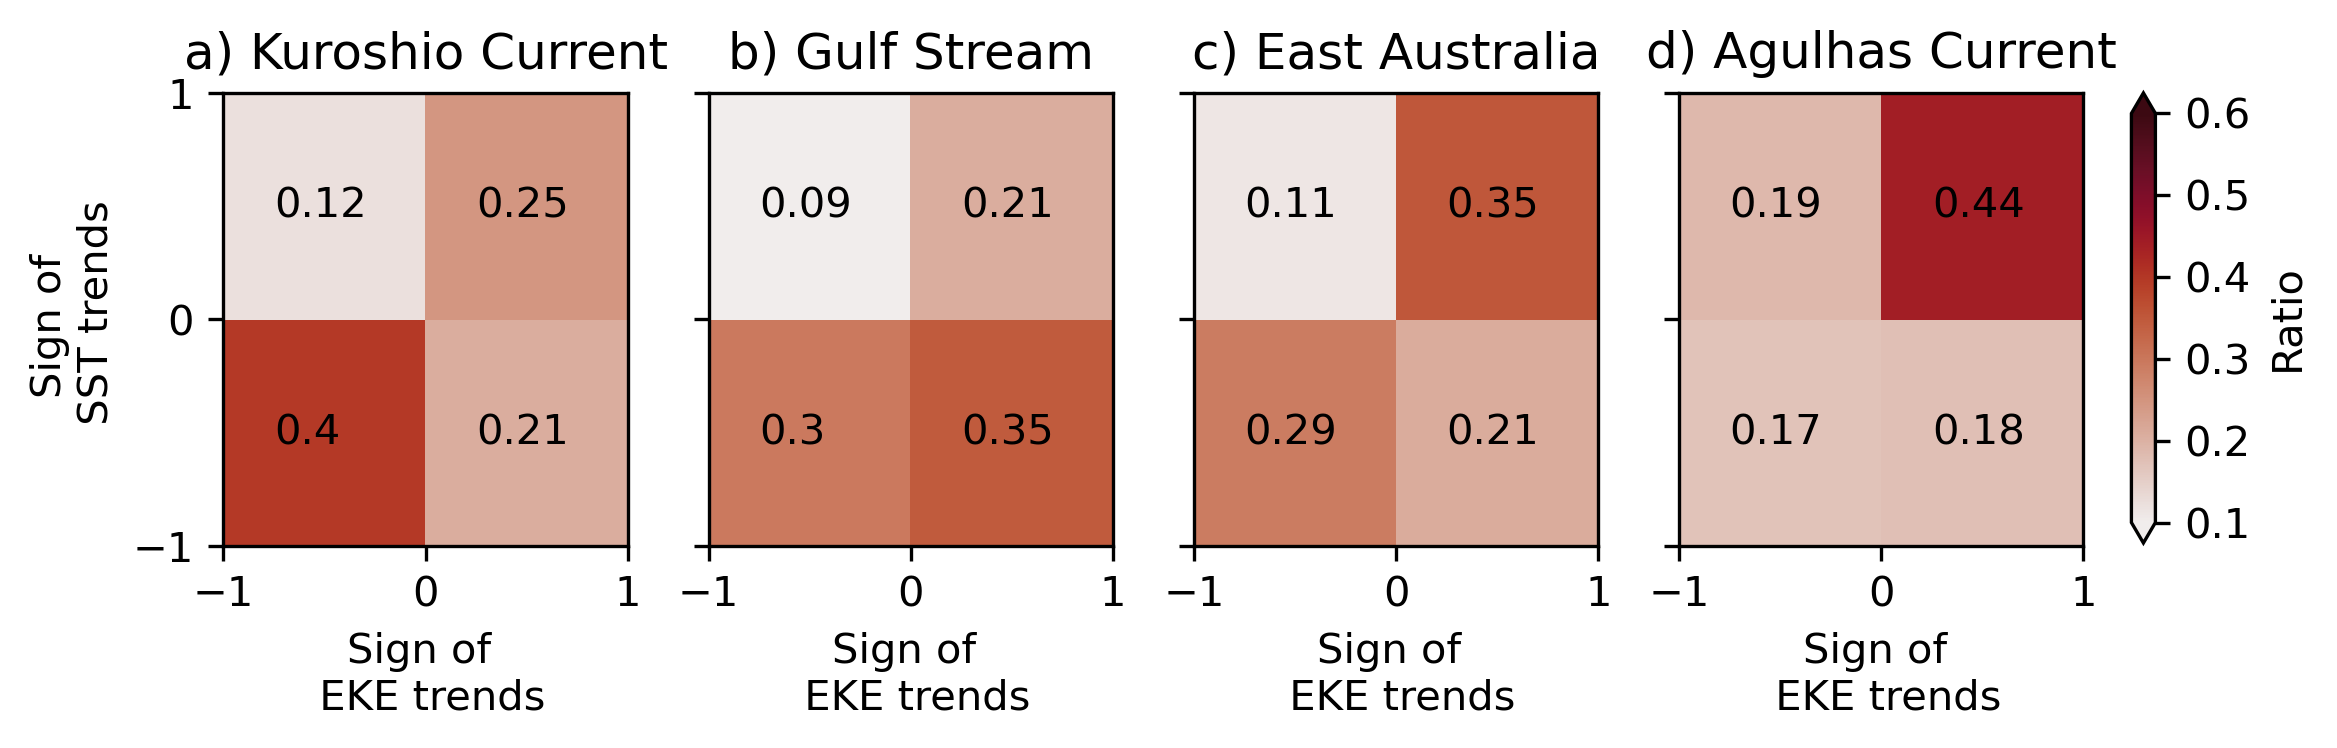

In [10]:
f, axes = plt.subplots(1, 4, figsize=(8, 2), dpi=300, sharey=True,sharex=True)
counter = 0
for axe in axes:
    clm=axe.pcolormesh(x,y,ratio_dict[regions[counter]],vmin=0.1,vmax=0.6,cmap=cm.cm.amp)
    axe.set_title(full_area_name[counter])
    for i,v in enumerate(ratio_dict[regions[counter]].ravel()):
        if i == 0:
            axe.text(-0.75,-0.55,np.round(v,2))
        if i == 1:
            axe.text(0.25,-0.55,np.round(v,2))
        if i == 2:
            axe.text(-0.75,0.45,np.round(v,2))
        if i == 3:
            axe.text(0.25,0.45,np.round(v,2))
    counter +=1
    axe.set_xlabel('Sign of \n EKE trends')
axes[0].set_ylabel('Sign of \n SST trends')

plt.xticks([-1,0,1])
plt.yticks([-1,0,1])

cbar_ax = f.add_axes([0.92, 0.13, 0.01, 0.75])
cbar = f.colorbar(clm, cax=cbar_ax,orientation='vertical',extend='both')
cbar.set_label('Ratio', rotation=90, fontsize=10)
cbar.ax.tick_params(labelsize=10)
cbar.ax.yaxis.get_offset_text().set(size=10)

plt.savefig('../../LaTeX/figures/trends_sign_correlations.pdf',dpi=300,bbox_inches='tight')

**Extended  Data  Figure  4| Regional  ratio  of  mesoscale  SST  gradient  magnitude trends and surface EKE trends signs.**  (a) Kuroshio current; (b) Gulf Stream; (c) East Australian Current; (d) Agulhas retroflection.  The ratio was computed by integrating the area weighted sign of the SST gradient magnitude trends and surface EKE trends divided by the total area of the region plotted in the Fig. 3.  Quadrants I and III of each panel show colocated regions with the same sign in SST gradients and EKE trends, more than 60% of the signs in the (a) Kuroshio current, (c) East Australian Current, and (d) Agulhas retroflection are colocated.